<a href="https://colab.research.google.com/github/naidu419/data_science_1/blob/main/cricket_worldcup_data_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import display

In [24]:
uploaded = files.upload();
df = pd.read_csv("icc-cricket-world-cup-odi.csv")

Saving icc-cricket-world-cup-odi.csv to icc-cricket-world-cup-odi.csv


In [25]:
def visualize_column(column_name, chart_type="pie", top_n=4):
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in dataset.")
        return

    value_counts = df[column_name].value_counts().head(top_n)

    if chart_type == "pie":
        plt.figure(figsize=(7, 7))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f"Top {top_n} {column_name} Distribution")
        plt.show()

    elif chart_type == "bar":
        plt.figure(figsize=(8, 5))
        value_counts.plot(kind='bar', color='skyblue')
        plt.title(f"Top {top_n} {column_name} Counts")
        plt.xlabel(column_name)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("Invalid chart type. Use 'pie' or 'bar'.")


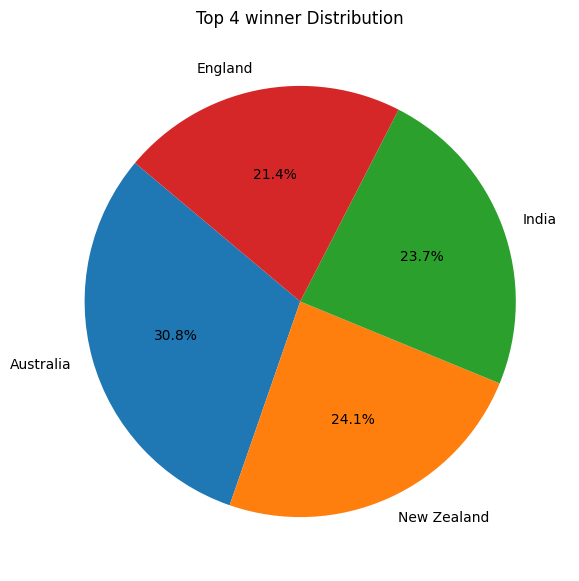

In [27]:
visualize_column("winner", chart_type="pie", top_n=4)

In [32]:
def visualize_column(column_name, chart_type="pie", top_n=4):
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in dataset.")
        return

    value_counts = df[column_name].value_counts().head(top_n)

    if chart_type == "pie":
        plt.figure(figsize=(7, 7))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f"Top {top_n} {column_name} Distribution")
        plt.show()

    elif chart_type == "bar":
        plt.figure(figsize=(8, 5))
        value_counts.plot(kind='bar', color='skyblue')
        plt.title(f"Top {top_n} {column_name} Counts")
        plt.xlabel(column_name)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("Invalid chart type. Use 'pie' or 'bar'.")


In [33]:
def get_winner_by_season(season_value):
    if "season" not in df.columns or "winner" not in df.columns:
        print("The dataset must contain 'season' and 'winner' columns.")
        return

    season_data = df[df["season"].astype(str) == str(season_value)]
    if season_data.empty:
        print(f"No matches found for season {season_value}")
        return

    winner_counts = season_data["winner"].value_counts()
    print(f"Winner details for season {season_value}:")
    display(season_data[["season", "winner"]].drop_duplicates())

    # Show chart for winners that season
    plt.figure(figsize=(6, 6))
    plt.pie(winner_counts, labels=winner_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Winners in {season_value}")
    plt.show()

Winner details for season 2019:


,season,winner
0,2019,England
1,2019,West Indies
2,2019,New Zealand
3,2019,Australia
4,2019,Bangladesh
5,2019,Pakistan
6,2019,Sri Lanka
7,2019,India
10,2019,Match abandoned without a ball bowled
14,2019,No result


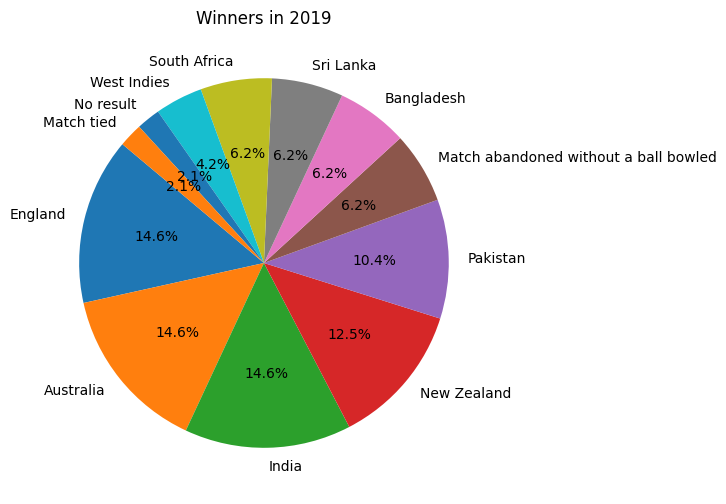

In [47]:
get_winner_by_season("2019")

In [35]:
def india_wins_pie():
    if "winner" not in df.columns:
        print("The dataset must have a 'winner' column.")
        return

    india_wins = df[df["winner"].str.strip().str.lower() == "india"]

    if india_wins.empty:
        print("No matches found where India was the winner.")
        return

    wins_by_season = india_wins["season"].value_counts().sort_index()

    plt.figure(figsize=(7, 7))
    plt.pie(wins_by_season, labels=wins_by_season.index, autopct='%1.1f%%', startangle=140)
    plt.title("India Wins by Season")
    plt.show()


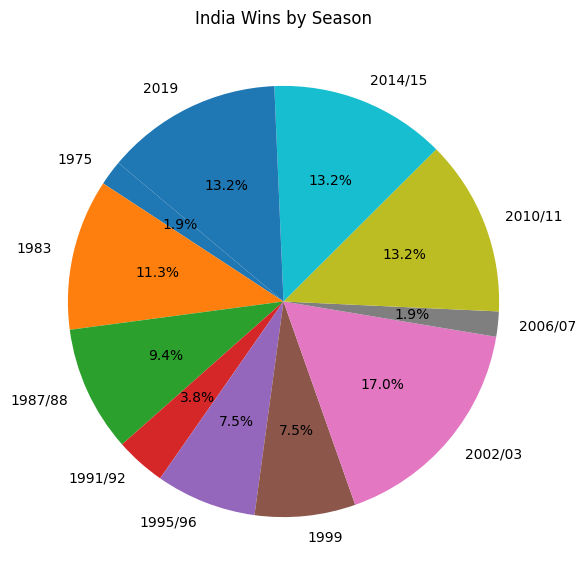

In [36]:
india_wins_pie()

In [50]:
def bargraph_venues(top_n=10):
    if "stadium" not in df.columns:
        print("The dataset must have a 'stadium' column.")
        return

    venue_counts = df["stadium"].value_counts().head(top_n)

    plt.figure(figsize=(10, 6))
    venue_counts.plot(kind="bar", color="orange")
    plt.title(f"Top {top_n} Venues by Number of Matches")
    plt.xlabel("Stadium")
    plt.ylabel("Number of Matches")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

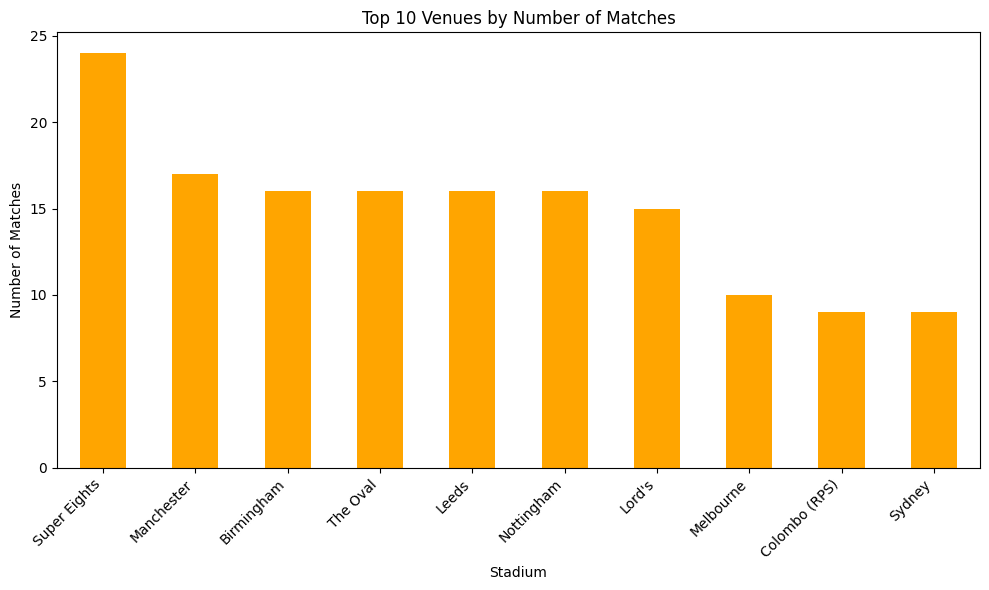

In [51]:
bargraph_venues(top_n=10)

In [59]:
def show_all_seasons_hosts():
    if "season" not in df.columns or "host" not in df.columns:
        print("The dataset must contain 'season' and 'host' columns.")
        return

    seasons_hosts = df[["season", "host"]].drop_duplicates().reset_index(drop=True)

    print("All Seasons and their Hosts:")
    display(seasons_hosts.style.set_table_styles(
        [
            {'selector': 'table', 'props': [('border', '2px solid black'), ('border-collapse', 'collapse')]},
            {'selector': 'th', 'props': [('border', '1px solid black'), ('padding', '8px'), ('background-color', 'black')]},
            {'selector': 'td', 'props': [('border', '1px solid black'), ('padding', '8px')]}
        ]
    ).set_caption("ICC Cricket World Cup Seasons and Hosts"))

    host_counts = seasons_hosts["host"].value_counts()

    plt.figure(figsize=(7, 7))
    plt.pie(
        host_counts,
        labels=host_counts.index,
        autopct='%1.1f%%',
        startangle=140
    )
    plt.title("Host Country Distribution Across All Seasons")
    plt.show()

All Seasons and their Hosts:


,season,host
0,2019,England
1,1979,England
2,1983,England
3,2010/11,Bangladesh/India/Sri Lanka
4,2002/03,Kenya/South Africa/Zimbabwe
5,1995/96,India/Pakistan/Sri Lanka
6,1991/92,Australia/New Zealand
7,1975,England
8,1987/88,India/Pakistan
9,1999,England/Ireland/Netherlands/Scotland


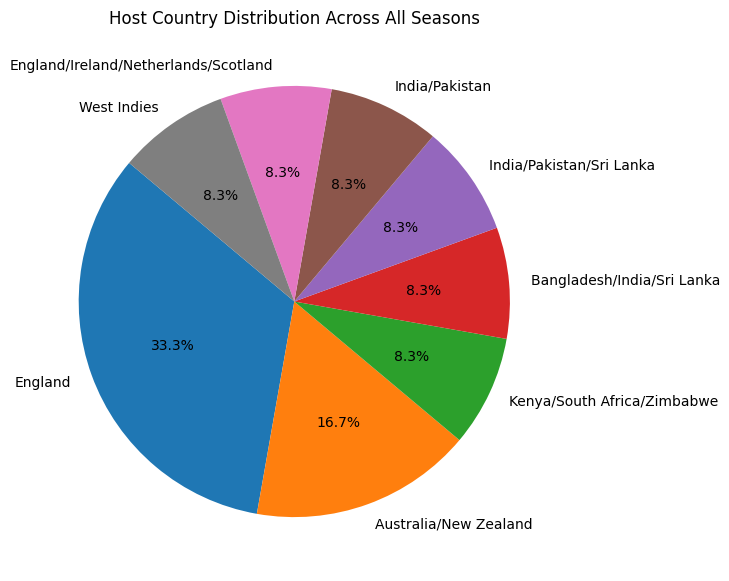

In [60]:
show_all_seasons_hosts()

In [64]:
df_cwc = pd.read_csv("icc-cricket-world-cup-odi.csv")
df_margin = df_cwc[['season', 'team_1', 'team_2', 'winner', 'margin']].copy()
df_margin['margin_num'] = df_margin['margin'].str.extract(r'(\d+)').astype(float)
top4_wins = df_margin.sort_values(by='margin_num', ascending=False).head(4)
top4_wins = top4_wins[['season', 'winner', 'team_2', 'margin']].reset_index(drop=True)
display(top4_wins.style.set_table_attributes('border="1" class="dataframe table table-bordered table-hover"'))

,season,winner,team_2,margin
0,2014/15,Australia,Afghanistan,275
1,2006/07,India,Bermuda,257
2,2014/15,South Africa,West Indies,257
3,2002/03,Australia,Namibia,256


In [ ]:
from google.colab import drive
drive.mount('/content/drive')